<a href="https://colab.research.google.com/github/nadyasyahrita/Classification_Bank-Marketing/blob/main/Clustering_Mall_Customer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#**Clustering**
Clustering is the task of dividing the population or data points into a number of groups such that data points in the same groups are more similar to other data points in the same group than those in other groups. In simple words, the aim is to segregate groups with similar traits and assign them into clusters.




###**Import Libraries**

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

###**Import Raw Dataset**

In [72]:
#import dataset
mall_customer=pd.read_csv('https://raw.githubusercontent.com/nadyasyahrita/Mall-Customer-Segmentation-Data/main/Mall_Customers.csv')
mall_customer

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [73]:
#print the dataset information
mall_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [74]:
#print descrptive statistics
mall_customer.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [75]:
mall_customer.isnull().sum() #melihat data yang bernilai null

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [76]:
data = mall_customer.copy()
data = mall_customer.drop(['CustomerID'], axis=1)
mall_customer.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [77]:
data = feature[['Annual Income (k$)', 'Spending Score (1-100)']]
data.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


###**Data Preprocessing**
First, we standardize the data to equalize the range and/or data variability. Feature standardization makes the values of each feature in the data have zero-mean (when subtracting the mean in the numerator) and unit-variance.

In [78]:
from sklearn.preprocessing import OneHotEncoder

# Encoder
encoder = OneHotEncoder(sparse=False)

# Encode Categorical Data
df_encoded = pd.DataFrame(encoder.fit_transform(mall_customer[['Gender']]))
df_encoded.columns = encoder.get_feature_names(['Gender'])

# Replace Categotical Data with Encoded Data
mall_customer.drop(['Gender'] ,axis=1, inplace=True)
df_encoded= pd.concat([mall_customer, df_encoded], axis=1)

# Show Encoded Dataframe
df_copy = df_encoded
df_copy

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,1,19,15,39,0.0,1.0
1,2,21,15,81,0.0,1.0
2,3,20,16,6,1.0,0.0
3,4,23,16,77,1.0,0.0
4,5,31,17,40,1.0,0.0
...,...,...,...,...,...,...
195,196,35,120,79,1.0,0.0
196,197,45,126,28,1.0,0.0
197,198,32,126,74,0.0,1.0
198,199,32,137,18,0.0,1.0


In [79]:
# Importing Standardscalar Module 
from sklearn.preprocessing import StandardScaler 

# Set Name for StandardScaler as scaler
scaler = StandardScaler() 

# Fit Standardization
column_names = mall_customer.columns.tolist()
mall_customer[column_names] = scaler.fit_transform(mall_customer[column_names])
mall_customer.sort_index(inplace=True)
mall_customer

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,-1.723412,-1.424569,-1.738999,-0.434801
1,-1.706091,-1.281035,-1.738999,1.195704
2,-1.688771,-1.352802,-1.700830,-1.715913
3,-1.671450,-1.137502,-1.700830,1.040418
4,-1.654129,-0.563369,-1.662660,-0.395980
...,...,...,...,...
195,1.654129,-0.276302,2.268791,1.118061
196,1.671450,0.441365,2.497807,-0.861839
197,1.688771,-0.491602,2.497807,0.923953
198,1.706091,-0.491602,2.917671,-1.250054


###**Data Visualization**

Text(0, 0.5, 'Annual Spend')

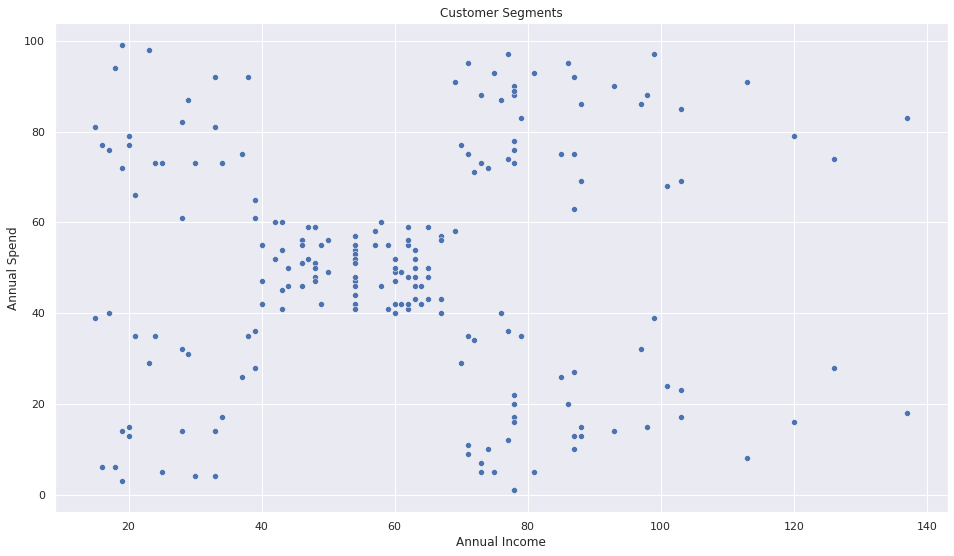

In [80]:
#Styling Plot
sns.set()
plt.rcParams['figure.figsize']=(16,9)

#Visualizing the data
sns.scatterplot(x='Annual Income (k$)',y='Spending Score (1-100)',data=df_encoded)
plt.title('Customer Segments')
plt.xlabel('Annual Income')
plt.ylabel('Annual Spend')

##**K-Means Clustering**
Kmeans algorithm is an iterative algorithm that tries to partition the dataset into Kpre-defined distinct non-overlapping subgroups (clusters) where each data point belongs to only one group. It tries to make the inter-cluster data points as similar as possible while also keeping the clusters as different (far) as possible. It assigns data points to a cluster such that the sum of the squared distance between the data points and the cluster’s centroid (arithmetic mean of all the data points that belong to that cluster) is at the minimum. The less variation we have within clusters, the more homogeneous (similar) the data points are within the same cluster.

##**Search the Optimum Number of Cluster(k)**

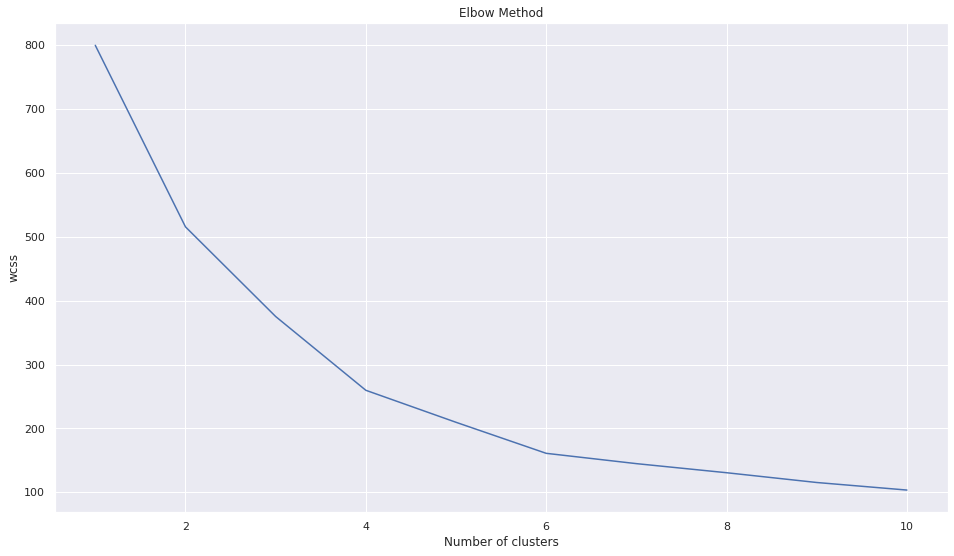

In [81]:
# Transform Data Frame to Numpy Array
income = mall_customer.to_numpy()
income

# Elbow Method
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(income)
    wcss.append(kmeans.inertia_)
  
# Visualize 
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [82]:
# Silhoutte Method
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(income)
    label = kmeans.labels_
    sil_coeff = silhouette_score(income, label, metric='euclidean')
    print('For n_clusters={}, The Silhouette Coefficient is {}'.format(n_cluster, sil_coeff))

For n_clusters=2, The Silhouette Coefficient is 0.3185134408711024
For n_clusters=3, The Silhouette Coefficient is 0.33627250175154105
For n_clusters=4, The Silhouette Coefficient is 0.4140456252637291
For n_clusters=5, The Silhouette Coefficient is 0.4272395443393026
For n_clusters=6, The Silhouette Coefficient is 0.4390404164555763
For n_clusters=7, The Silhouette Coefficient is 0.4047855360121988
For n_clusters=8, The Silhouette Coefficient is 0.3989590350533749
For n_clusters=9, The Silhouette Coefficient is 0.3848985889326719
For n_clusters=10, The Silhouette Coefficient is 0.38826047768010796


dari hasil elbow method dapat dilihat bahwa nilai k yang terbaik adalah 4, maka k=4

##**Modeling K-Means**

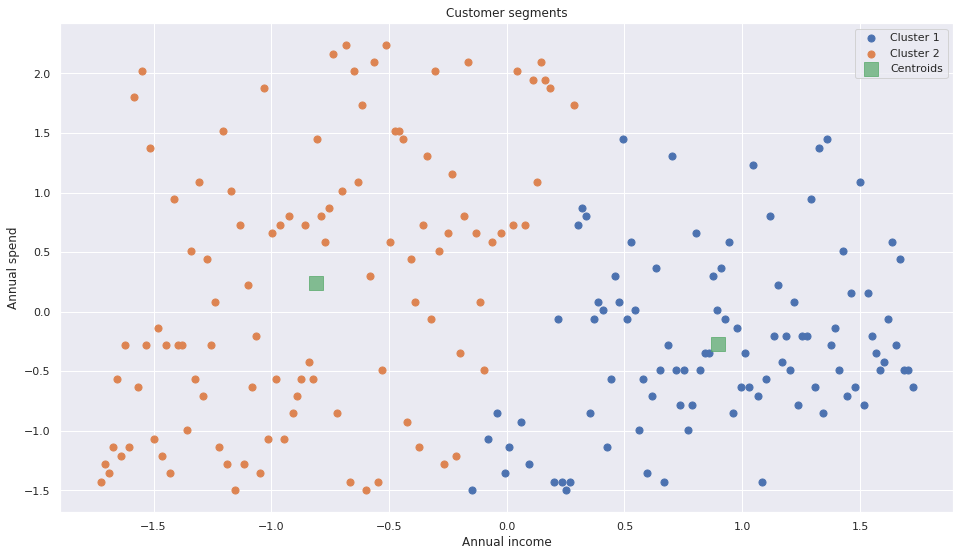

In [85]:
# Apply the K-Means Model to the Data
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster = kmeans.fit_predict(income)

# Visualising Clusters for k=2
#sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df_encoded)
plt.scatter(income[cluster == 0, 0], income[cluster == 0, 1], s = 50, label = 'Cluster 1')
plt.scatter(income[cluster == 1, 0], income[cluster == 1, 1], s = 50, label = 'Cluster 2')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s=200,marker='s', alpha=0.7, label='Centroids')
plt.title('Customer segments')
plt.xlabel('Annual income')
plt.ylabel('Annual spend')
plt.legend()
plt.show()

##**Analisis model**
dari data yang sudah dimodelkan dapat dilihat bahwa data dibagi menjadi 2 kluster, yaitu berpendapatan rendah dan berpendapatan tinggi.


*   warna oranye memperlihatkan customer dengan pendapatan rendah dan pengeluaran yang tinggi, sehingga digolongkan menjadi boros
*   warna biru memperlihatkan customer dengan pendapatan cukup tinggi dan pengeluaran rata-rata tinggi



In [86]:
# Add Cluster Information to the Raw Data
mall_customer['cluster'] = cluster
mall_customer

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),cluster
0,-1.723412,-1.424569,-1.738999,-0.434801,1
1,-1.706091,-1.281035,-1.738999,1.195704,1
2,-1.688771,-1.352802,-1.700830,-1.715913,1
3,-1.671450,-1.137502,-1.700830,1.040418,1
4,-1.654129,-0.563369,-1.662660,-0.395980,1
...,...,...,...,...,...
195,1.654129,-0.276302,2.268791,1.118061,0
196,1.671450,0.441365,2.497807,-0.861839,0
197,1.688771,-0.491602,2.497807,0.923953,0
198,1.706091,-0.491602,2.917671,-1.250054,0


In [87]:
# Save= Result
mall_customer.to_csv('income_clusters.csv', index=False)

##**Hierarchical Clustering**
Hierarchical clustering (also called hierarchical cluster analysis or HCA) is a method of cluster analysis which seeks to build a hierarchy of clusters. The endpoint is a set of clusters, where each cluster is distinct from each other cluster, and the objects within each cluster are broadly similar to each other.

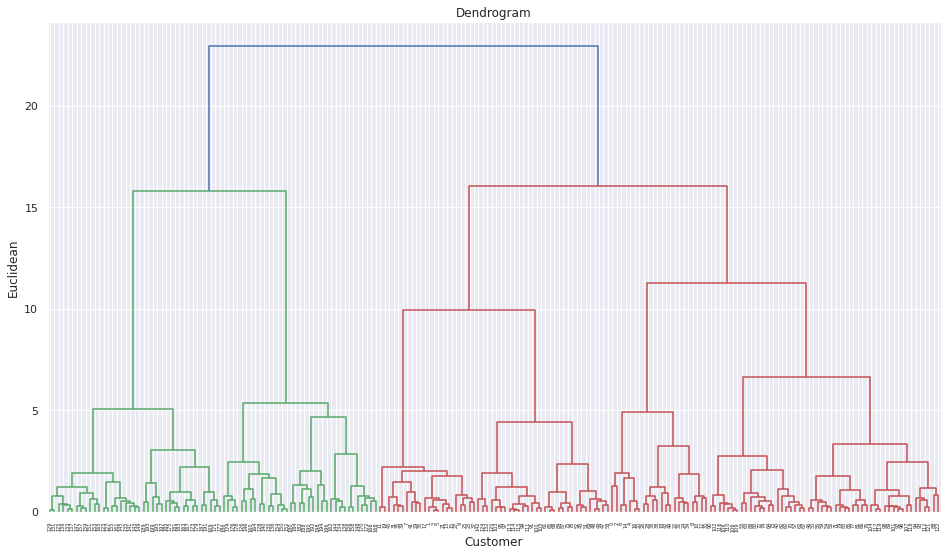

In [88]:
# Modeling and Visualizing Clusters by Dendogram
import scipy.cluster.hierarchy as sch
dend = sch.dendrogram(sch.linkage(income, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customer')
plt.ylabel('Euclidean')
plt.show()

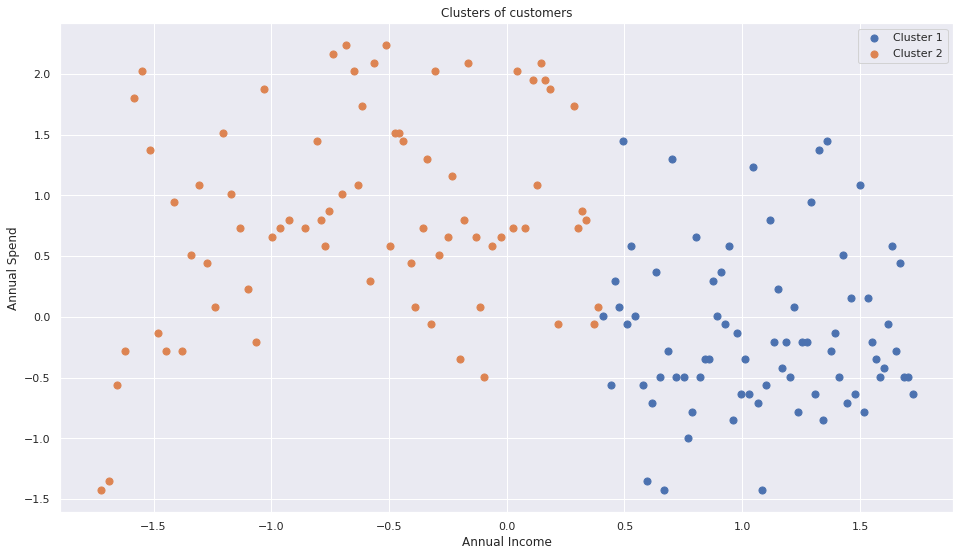

In [89]:
# Apply the Hierarchical Clustering Model to the Dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
hcluster = hc.fit_predict(income)

# Visualising Clusters for k=2
#sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df_encoded)
plt.scatter(income[hcluster == 0, 0], income[hcluster == 0, 1], s = 50, label = 'Cluster 1')
plt.scatter(income[hcluster == 1, 0], income[hcluster == 1, 1], s = 50, label = 'Cluster 2')
plt.title('Clusters of customers')
plt.xlabel('Annual Income')
plt.ylabel('Annual Spend')
plt.legend()
plt.show()